In [455]:
# Imported Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import  poisson

In [462]:
#Import csv files to python as a dataframe
bets = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\bets.csv") 
booking = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\booking.csv") 
goals = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\goals.csv") 
matches = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\matches.csv") 
stats = pd.read_csv(r"C:\Users\elif.erdem\Desktop\Master\IE-582\HW-1\stats.csv") 

* Matches dataframe consists of the info required for Q1. Hence, this df is analyzed with describe and info detailly.

In [463]:
matches.shape
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 17 columns):
match_awayteam_id                5137 non-null int64
match_hometeam_id                5137 non-null int64
match_id                         5137 non-null int64
epoch                            5137 non-null int64
match_status                     5073 non-null object
match_live                       5137 non-null int64
match_hometeam_name              5137 non-null object
match_awayteam_name              5137 non-null object
match_hometeam_score             5073 non-null float64
match_awayteam_score             5073 non-null float64
match_hometeam_halftime_score    4711 non-null float64
match_awayteam_halftime_score    4711 non-null float64
match_hometeam_extra_score       4711 non-null float64
match_awayteam_extra_score       4711 non-null float64
match_hometeam_penalty_score     0 non-null float64
match_awayteam_penalty_score     0 non-null float64
league_id                       

* Type of columns which are with match_status, match_hometeam_name, match_awayteam_name is not numerical.
* Match_status, match_hometeam_score, match_awayteam_score,match_hometeam_halftime_score, match_awayteam_halftime_score,match_hometeam_extra_score, match_awayteam_extra_score, match_hometeam_penalty_score, match_awayteam_penalty_score columns have missing values.
* match_awayteam_penalty_score , match_hometeam_penalty_score  columns can be dropped since they do not include any info.


In [464]:
matches = matches.drop(columns=['match_hometeam_penalty_score', 'match_awayteam_penalty_score'])

In [465]:
matches.describe()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_live,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,league_id
count,5137.000000,5137.00000,5137.000000,5.137000e+03,5137.0,5073.000000,5073.000000,4711.000000,4711.000000,4711.000000,4711.000000,5137.000000
mean,4531.758809,4531.84232,142888.798521,1.539031e+09,0.0,1.571260,1.217426,0.673955,0.523456,0.673955,0.523456,287.737201
std,1942.916147,1942.99576,69741.254602,1.992203e+07,0.0,1.275102,1.172535,0.816132,0.731627,0.816132,0.731627,140.939789
min,2611.000000,2611.00000,13274.000000,1.505560e+09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.000000
25%,2679.000000,2679.00000,79111.000000,1.520015e+09,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.000000
50%,4171.000000,4171.00000,146838.000000,1.541254e+09,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,262.000000
75%,7097.000000,7097.00000,196510.000000,1.554642e+09,0.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,468.000000
max,7670.000000,7670.00000,318015.000000,1.571512e+09,0.0,8.000000,7.000000,6.000000,5.000000,6.000000,5.000000,512.000000


* Columns that are match_hometeam_score, match_awayteam_score, match_hometeam_halftime_score, match_awayteam_halftime_score, match_hometeam_extra_score, match_awayteam_extra_score analyzed min, max and mean values to analyze outliers

- English premier league is analyzed for the Q1. Hence, the raw data is limited for the LeagueId=148(EnglishPremier)

In [467]:
matches_premier= matches[matches['league_id']==148]

In [469]:
matches_premier.head(2)

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,league_id
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,148
5,2626,2623,13329,1505570400,Finished,0,Watford,Manchester City,0.0,6.0,0.0,3.0,0.0,3.0,148


In [470]:
matches_premier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 1 to 5118
Data columns (total 15 columns):
match_awayteam_id                628 non-null int64
match_hometeam_id                628 non-null int64
match_id                         628 non-null int64
epoch                            628 non-null int64
match_status                     618 non-null object
match_live                       628 non-null int64
match_hometeam_name              628 non-null object
match_awayteam_name              628 non-null object
match_hometeam_score             618 non-null float64
match_awayteam_score             618 non-null float64
match_hometeam_halftime_score    569 non-null float64
match_awayteam_halftime_score    569 non-null float64
match_hometeam_extra_score       569 non-null float64
match_awayteam_extra_score       569 non-null float64
league_id                        628 non-null int64
dtypes: float64(6), int64(6), object(3)
memory usage: 78.5+ KB


In [471]:
matches_premier = matches_premier[matches_premier['match_status']=='Finished']

* Match_satus=Finished is selected

In [320]:
matches_premier = matches_premier.drop_duplicates()
matches_premier['match_id'].duplicated().unique()

array([False])

* Duplicate values and NAN values ara dropped.

In [475]:
matches_premier.shape

(618, 15)

In [476]:
matches_premier = matches_premier[matches_premier['match_hometeam_score'].notnull()]

In [477]:
matches_premier = matches_premier[matches_premier['match_awayteam_score'].notnull()]

* Each match must contain scores

In [478]:
matches_premier.columns

Index(['match_awayteam_id', 'match_hometeam_id', 'match_id', 'epoch',
       'match_status', 'match_live', 'match_hometeam_name',
       'match_awayteam_name', 'match_hometeam_score', 'match_awayteam_score',
       'match_hometeam_halftime_score', 'match_awayteam_halftime_score',
       'match_hometeam_extra_score', 'match_awayteam_extra_score',
       'league_id'],
      dtype='object')

In [480]:
matches_premier_control = matches_premier.groupby(['match_id']).count()

In [328]:
matches_premier_control.shape

(618, 14)

* Data is singuler based of match_id.

In [481]:
matches_premier = matches_premier[['match_id', 'match_hometeam_score', 'match_awayteam_score', 'match_hometeam_extra_score', 'match_awayteam_extra_score']]

In [491]:
matches_premier['difference'] =  matches_premier['match_hometeam_score'] -  matches_premier['match_awayteam_score']

* Only neccessary columns are selected

In [483]:
matches_premier.describe()

,match_id,match_hometeam_score,match_awayteam_score,match_hometeam_extra_score,match_awayteam_extra_score,Home-Away
count,618.000000,618.000000,618.000000,569.000000,569.000000,618.000000
mean,134960.289644,1.601942,1.228155,0.687170,0.555360,0.373786
std,63490.631354,1.314474,1.181180,0.884447,0.765113,1.889429
min,13274.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,75030.750000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,145185.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,183814.750000,2.000000,2.000000,1.000000,1.000000,2.000000
max,307209.000000,8.000000,6.000000,5.000000,3.000000,8.000000


In [495]:
matches_premier['match_hometeam_score'].size

618

# Task 1 

In [521]:
mean =int( matches_premier['match_hometeam_score'].mean())

In [523]:
size= int(matches_premier['match_hometeam_score'].size)

In [531]:
bins_home =int( matches_premier['match_hometeam_score'].max())

In [532]:
range_min_home= int(matches_premier['match_hometeam_score'].min())

Text(0, 0.5, 'Number of Games')

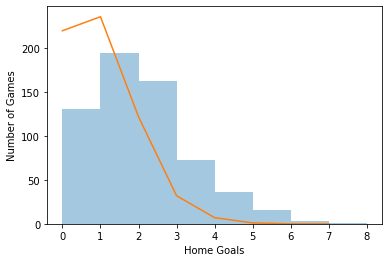

In [533]:
sns.distplot(matches_premier.match_hometeam_score, kde=False, bins = bins_home) ## bins= max(match_hometeam_score)
poissonpmf = np.histogram(np.random.poisson(lam =mean, size = size),
                            bins=bins, range=(range_min_home, bins))
plt.plot(poissonpmf[0])
plt.xlabel('Home Goals')
plt.ylabel('Number of Games')


In [536]:
bins_away =int( matches_premier['match_awayteam_score'].max())

In [541]:
size_away= int(matches_premier['match_awayteam_score'].size)

In [539]:
mean_away =int( matches_premier['match_awayteam_score'].mean())

In [540]:
range_min_away= int(matches_premier['match_awayteam_score'].min())

Text(0, 0.5, 'Number of Games')

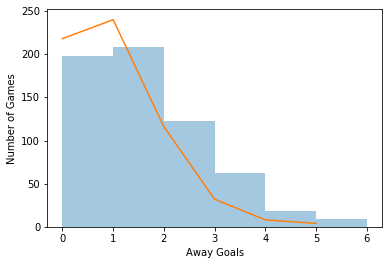

In [542]:
sns.distplot(matches_premier.match_awayteam_score, kde=False, bins = bins_away)#bins=max(match_awayteam_score)
poissonpmf = np.histogram(np.random.poisson(lam =mean_away, size = size_away),
                            bins=bins_away, range=(range_min_away, bins_away))
plt.plot(poissonpmf[0])
plt.xlabel('Away Goals')
plt.ylabel('Number of Games')


Text(0, 0.5, 'Number of Games')

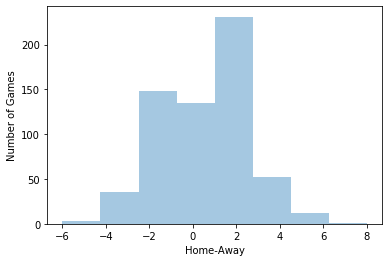

In [543]:
sns.distplot(matches_premier.difference, kde=False, bins = 8) ##bins =  max(match_hometeam_score) - min(match_awayteam_score)
plt.xlabel('Home-Away')
plt.ylabel('Number of Games')

# Task - 2

In [544]:
bets = bets[bets["odd_bookmakers"].isin(['10Bet', 'bwin', 'Unibet', 'Marathonbet'])]

In [545]:
bets = bets[bets['variable'].isin(['odd_1', 'odd_x', 'odd_2'])]

In [546]:
bets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31713 entries, 1 to 2118461
Data columns (total 5 columns):
match_id          31713 non-null int64
odd_bookmakers    31713 non-null object
odd_epoch         31713 non-null int64
variable          31713 non-null object
value             31713 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


* There is no NaN value

In [547]:
bets.describe()

,match_id,odd_epoch,value
count,31713.000000,3.171300e+04,31713.000000
mean,203653.726611,1.541379e+09,3.600759
std,34813.350460,2.692774e+07,2.424750
min,145899.000000,1.486315e+09,1.020000
25%,172366.000000,1.509548e+09,2.300000
50%,198611.000000,1.550907e+09,3.200000
75%,227535.000000,1.564154e+09,3.900000
max,317867.000000,1.570729e+09,34.000000


* especially values columns are analyzed in spite of min, max or mean

In [548]:
bets_maxepoch = bets.groupby(['match_id', 'odd_bookmakers', 'variable'])['odd_epoch'].max().reset_index()

In [549]:
bets_maxepoch.head(2)

,match_id,odd_bookmakers,variable,odd_epoch
0,145899,10Bet,odd_1,1489305781
1,145899,10Bet,odd_2,1489305781


In [550]:
bets.head(2)

,match_id,odd_bookmakers,odd_epoch,variable,value
1,151780,10Bet,1486314920,odd_1,2.15
10,151780,bwin,1486314920,odd_1,2.15


In [551]:
bets = pd.merge (bets,bets_maxepoch, how='right', on=bets_maxepoch.columns.tolist())

In [552]:
bets_control = bets.groupby(['match_id', 'odd_bookmakers', 'odd_epoch', 'variable']).count()
bets_control.shape

(24825, 1)

In [553]:
bets.shape

(24825, 5)

 * Data must be singular based on matchid, odd_bookmakers,odd_epoch, variable

* Based on match_id, odd_bookmakers, odd_epoch must be 3 type of variable and 3 row count

In [561]:
bets_pivot = pd.pivot_table(bets,index=['match_id','odd_bookmakers','odd_epoch'] ,columns='variable',values='value').reset_index()

In [564]:
bets_pivot['prob_odd_1'] = 1/bets_pivot['odd_1']
bets_pivot['prob_odd_x'] = 1/bets_pivot['odd_x']
bets_pivot['prob_odd_2'] = 1/bets_pivot['odd_2']

In [565]:
bets_pivot['normalization'] = bets_pivot['prob_odd_1'] + bets_pivot['prob_odd_x'] + bets_pivot['prob_odd_2']

In [566]:
bets_pivot['norm_odd_1'] = bets_pivot['prob_odd_1'] / bets_pivot['normalization']
bets_pivot['norm_odd_2'] = bets_pivot['prob_odd_2'] / bets_pivot['normalization']
bets_pivot['norm_odd_x'] = bets_pivot['prob_odd_x'] / bets_pivot['normalization']

In [567]:
bets_pivot = pd.merge(matches_premier, bets_pivot, how='inner', on='match_id')[bets_pivot.columns.tolist() + ['match_hometeam_score', 'match_awayteam_score', 'match_hometeam_extra_score', 'match_awayteam_extra_score']]

In [569]:
bets_pivot['home -win'] = bets_pivot['prob_odd_1'] -  bets_pivot['prob_odd_2']


In [654]:
bets_pivot['draw_flag'] = np.where(bets_pivot.match_hometeam_score - bets_pivot.match_awayteam_score==0, 1, 0)

In [660]:
bin_data = bets_pivot[bets_pivot['odd_bookmakers']=='Marathonbet'][['home -win', 'draw_flag']]
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
bin_data['range'] = pd.cut(bin_data['home -win'], bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], right=True, labels=False)+1

In [661]:
actual = bin_data.groupby(['range']).sum()/bin_data.groupby(['range']).count()

In [663]:
bin_ranges = []
for i in range(len(bins)-1):
    bin_ranges.append((bins[i]+ bins[i+1])/2)

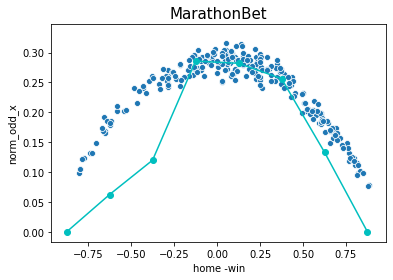

In [664]:
ax = sns.scatterplot(x="home -win", 
                       y="norm_odd_x",
                       data=bets_pivot[bets_pivot['odd_bookmakers']=='Marathonbet']).set_title('MarathonBet', fontsize = 15)

plt.plot(bin_ranges,actual['draw_flag'],'co-',
             alpha=1)

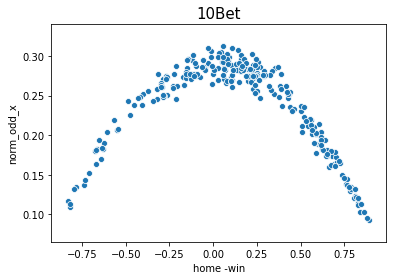

In [578]:
ax = sns.scatterplot(x="home -win", 
                       y="norm_odd_x",
                       data=bets_pivot[bets_pivot['odd_bookmakers']=='10Bet']).set_title('10Bet', fontsize = 15)

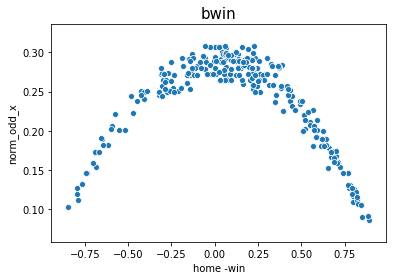

In [579]:
ax = sns.scatterplot(x="home -win", 
                       y="norm_odd_x",
                       data=bets_pivot[bets_pivot['odd_bookmakers']=='bwin']).set_title('bwin', fontsize = 15)

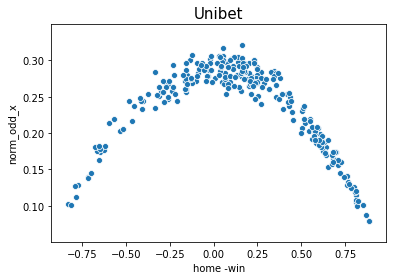

In [580]:
ax = sns.scatterplot(x="home -win", 
                       y="norm_odd_x",
                       data=bets_pivot[bets_pivot['odd_bookmakers']=='Unibet']).set_title('Unibet', fontsize = 15)

## Task - 3

In [386]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14920 entries, 1 to 16613
Data columns (total 5 columns):
match_id      14920 non-null int64
time          14920 non-null object
home_fault    7093 non-null object
card          14920 non-null object
away_fault    7813 non-null object
dtypes: int64(1), object(4)
memory usage: 699.4+ KB


In [383]:
booking.shape

(14920, 5)

In [384]:
booking = booking[~(booking['time'].str.contains('\+'))]

In [388]:
booking_for10min = booking[(booking['time'].astype(int)<10) & (booking['card']=='red card')] 

In [429]:
marathon_bet_pivot['red_card_flag'] = np.where(marathon_bet_pivot['match_id'].isin(list), 
                             1, 0)

In [433]:
marathon_bet_pivot['after_90_flag'] = np.where((marathon_bet_pivot['match_hometeam_score'] -marathon_bet_pivot['match_hometeam_extra_score'])  -(marathon_bet_pivot['match_awayteam_score'] -marathon_bet_pivot['match_awayteam_extra_score'])!=0, 1, 0)

In [434]:
marathon_bet_pivot

,match_id,odd_1,odd_2,odd_x,prob_odd_1,prob_odd_x,prob_odd_2,normalization,norm_odd_1,norm_odd_2,norm_odd_x,match_hometeam_score,match_awayteam_score,match_hometeam_extra_score,match_awayteam_extra_score,home -win,draw_flag,red_card_flag,after_90_flag
0,150842,5.20,1.75,3.70,0.192308,0.270270,0.571429,1.034007,0.185983,0.552635,0.261382,0.0,0.0,0.0,0.0,-0.366652,1,0,0
1,150844,3.10,2.44,3.30,0.322581,0.303030,0.409836,1.035447,0.311538,0.395806,0.292657,3.0,1.0,1.0,0.0,-0.084268,0,0,1
2,156847,1.80,4.90,3.75,0.555556,0.266667,0.204082,1.026304,0.541317,0.198851,0.259832,2.0,0.0,2.0,0.0,0.342466,0,0,0
3,156845,2.38,3.54,3.10,0.420168,0.322581,0.282486,1.025235,0.409826,0.275533,0.314641,2.0,0.0,1.0,0.0,0.134293,0,0,1
4,156850,1.79,5.30,3.58,0.558659,0.279330,0.188679,1.026668,0.544148,0.183778,0.272074,2.0,2.0,NaN,NaN,0.360370,1,0,1
5,157536,3.35,2.24,3.55,0.298507,0.281690,0.446429,1.026626,0.290765,0.434850,0.274384,4.0,2.0,1.0,2.0,-0.144085,0,0,1
6,157537,1.31,12.00,5.60,0.763359,0.178571,0.083333,1.025264,0.744549,0.081280,0.174171,1.0,0.0,0.0,0.0,0.663269,0,0,1
7,158697,1.15,21.00,10.00,0.869565,0.100000,0.047619,1.017184,0.854875,0.046815,0.098311,3.0,1.0,3.0,0.0,0.808060,0,0,1
8,158699,1.62,6.20,4.25,0.617284,0.235294,0.161290,1.013868,0.608840,0.159084,0.232076,1.0,2.0,0.0,1.0,0.449756,0,0,0
9,159175,8.70,1.44,4.85,0.114943,0.206186,0.694444,1.015573,0.113180,0.683796,0.203024,0.0,4.0,0.0,1.0,-0.570616,0,0,1


In [397]:
list = booking_for10min['match_id'].tolist()

In [404]:
marathonbet_pivot.head(2)

variable,match_id,odd_1,odd_2,odd_x,prob_odd_1,prob_odd_x,prob_odd_2,normalization,norm_odd_1,norm_odd_2,norm_odd_x
0,145899,7.60,1.44,4.75,0.131579,0.210526,0.694444,1.036550,0.126939,0.669958,0.203103
1,145900,2.32,2.85,3.92,0.431034,0.255102,0.350877,1.037014,0.415650,0.338353,0.245997


In [399]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14920 entries, 1 to 16613
Data columns (total 5 columns):
match_id      14920 non-null int64
time          14920 non-null object
home_fault    7093 non-null object
card          14920 non-null object
away_fault    7813 non-null object
dtypes: int64(1), object(4)
memory usage: 699.4+ KB


In [403]:
list

[13392,
 63816,
 66293,
 91795,
 94284,
 119356,
 128973,
 144687,
 157538,
 163754,
 167635,
 183818,
 184190,
 184762,
 186626,
 261907,
 271125]

In [402]:
marathonbet_pivot_control = marathonbet_pivot[marathonbet_pivot['match_id'] not in (list)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [357]:
matches.head(2)

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,league_id
0,7109,7097,41196,1505559600,Finished,0,Levante,Valencia,1.0,1.0,1.0,1.0,1.0,1.0,468
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,148
